# Bank Term Deposit Prediction

##### Problem Statement:

Build a Decision Tree classifier to predict if the client will subscribe to a Term Deposit based on their demographic and behavioral data.


##### Dataset

This dataset is a Bank Marketing dataset from the UCI Machine Learning Repository (https://docs.google.com/spreadsheets/d/1oTqQ1nwwVfv49gWszShu4CfWVuCfYj9r/edit?usp=sharing&ouid=107093930789725076517&rtpof=true&sd=true)

The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

##### Column Description:
- age	: Integer	Age
- job : Occupation
- marital : Marital Status
- education : Education Level
- default : has credit in default?
- balance : average yearly balance in euros
- housing :	has housing loan?
- loan : has personal loan?
- contact : contact communication type
- day_of_month : last contact day of the month
- duration : last contact duration, in seconds (numeric)
- campaign : number of contacts performed during this campaign and for this client
- pdays : number of days that passed by after the client was last contacted from a previous campaign(numeric, -1 means client was not previously contacted)
- previous : number of contacts performed before this campaign and for this client
- poutcome : outcome of the previous marketing campaign
- y : has the client subscribed a term deposit? (outcome)

In [ ]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
bank=pd.read_csv("bankdataset.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
bank.shape

(45211, 17)

# Data Pre-processing

In [ ]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
bank_shape = bank.shape
bank_shape

(45211, 17)

In [ ]:
bank_types =bank.dtypes
bank_types

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [ ]:
statistical_summary = bank.describe(include='all')
statistical_summary

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [ ]:
#Checking for duplicates
bank.duplicated().sum()

0

# Exploratory Data **Analysis** **bold text**


#### Age Distribution

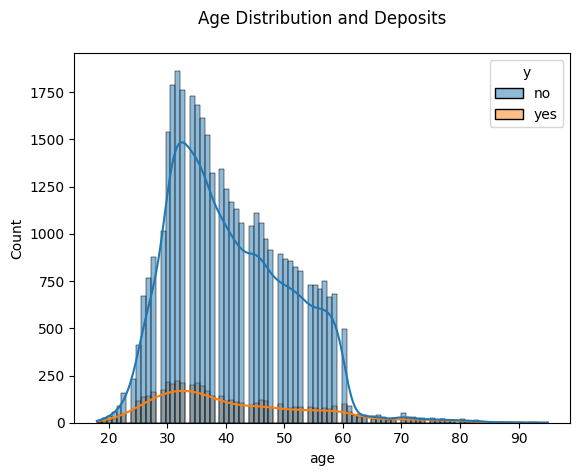

In [ ]:
sns.histplot(x="age", data=bank, kde=True, hue= "y")
plt.title("Age Distribution and Deposits\n")
plt.show()

Maximum clients are between the age 30 - 40 and majority clients subscribing to Term Deposit also fall between these age groups.


#### Distribution of Occupation

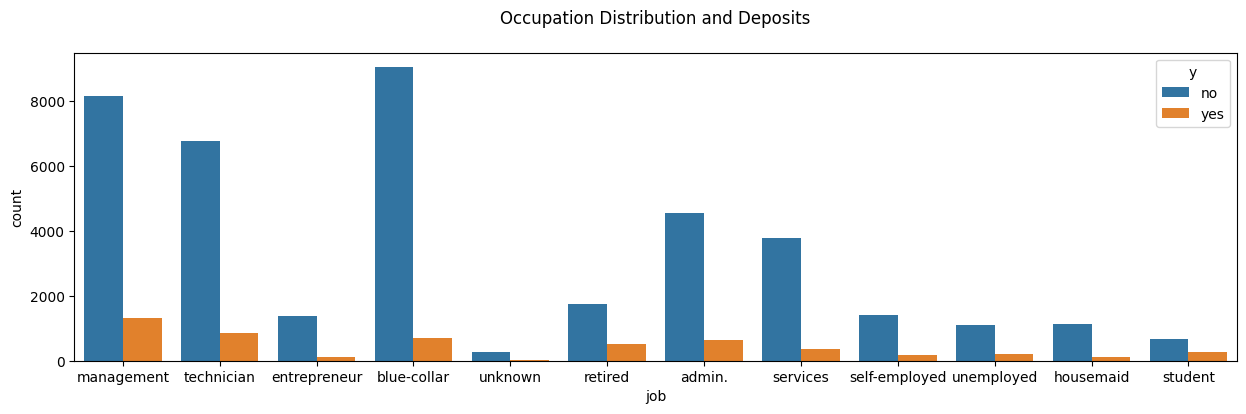

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x="job", data= bank, hue ="y")
plt.title("Occupation Distribution and Deposits\n")
plt.show()

Majority of clients have occupation "Admin", "blue-collar" or "Technician" and maximum clients subscribing to Term Deposit also are from these occupation.

#### Distribution of Personal Loan

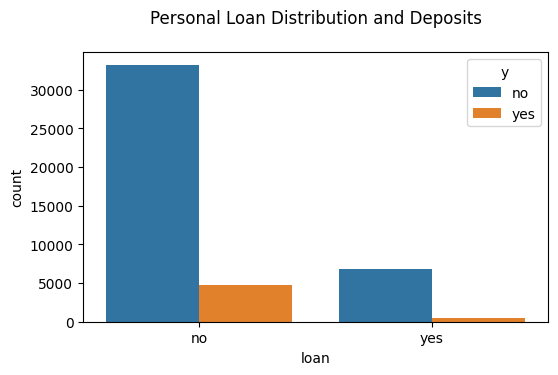

In [ ]:
plt.figure(figsize=(6,3.5))
sns.countplot(x="loan", data= bank, hue ="y")
plt.title("Personal Loan Distribution and Deposits\n")
plt.show()

Most of the Clients subscribing to Term Deposits dont have personal loan

#### Distribution of Outcome (Term Deposits)

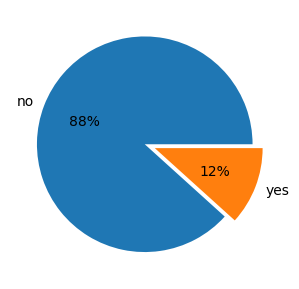

In [ ]:
#Count of Outcome
bank.y.value_counts()
keys = bank.y.value_counts().index
data = bank.y.value_counts().values
plt.figure(figsize=(6,3.5))
explode = [0,0.1]
plt.pie(data,labels=keys,explode=explode, autopct='%.0f%%')
plt.show()

12% of clients have subscribed to Term Deposit



Let us now prepare our data for Model building

# Label Encoding Categorical **Features**

In [ ]:
cols = bank.select_dtypes("object").columns
cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
le = LabelEncoder()

bank[cols] = bank[cols].apply(le.fit_transform)

In [ ]:
bank.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0


#### Correlation Analysis using Heatmap

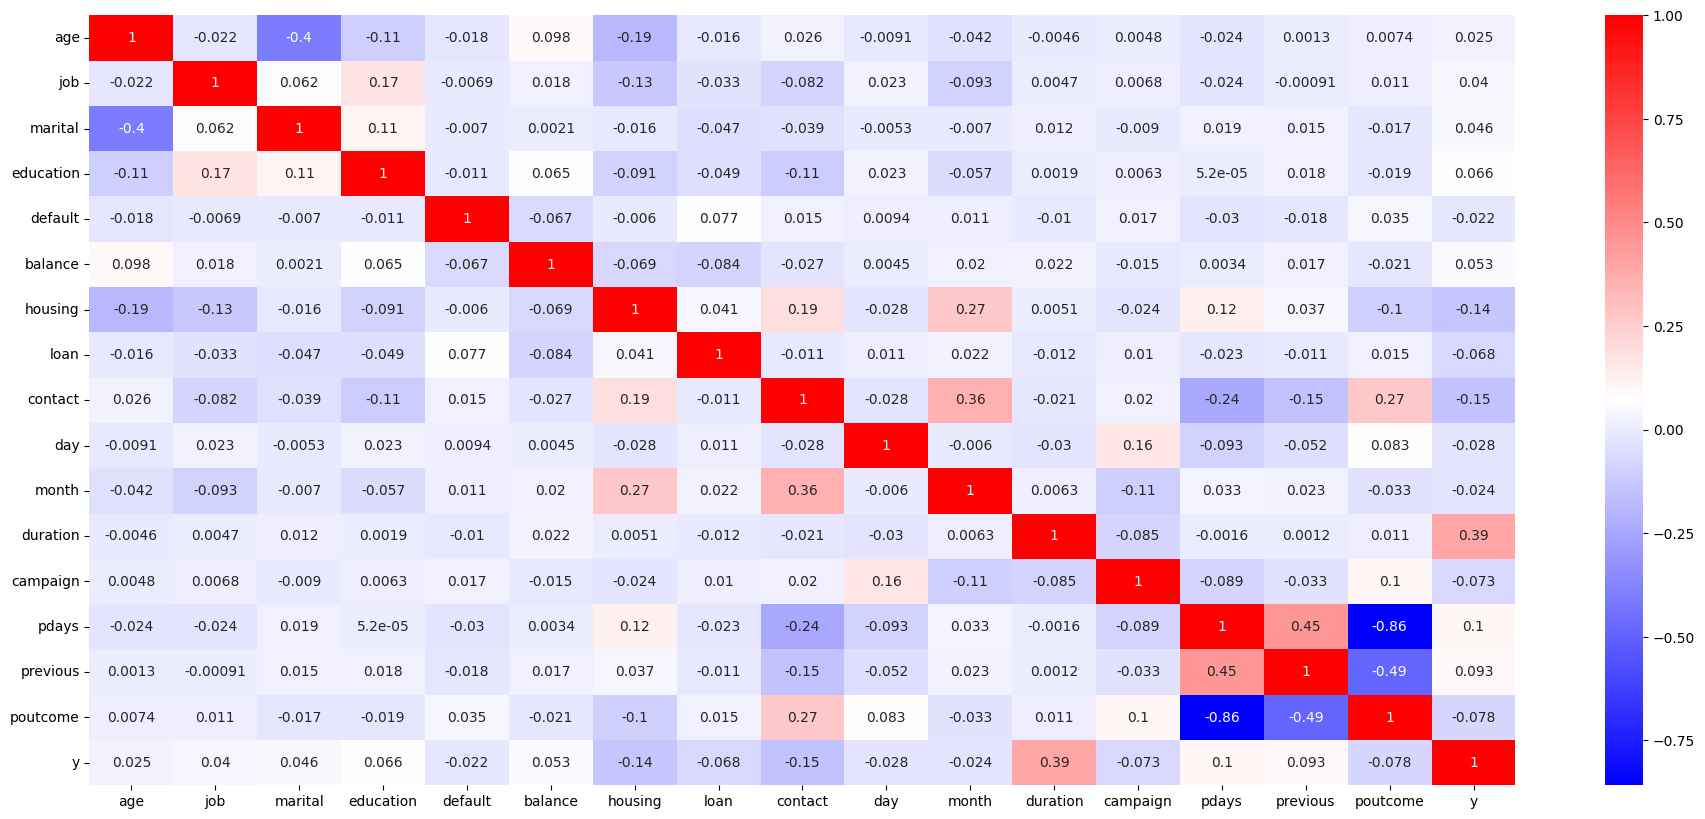

In [ ]:
plt.figure(figsize=(23,10))
sns.heatmap(bank.corr(), cmap='bwr', annot=True)
plt.show()

- Outcome "y" is positively correlated with duration of call and also shows slight correlation with previous attempts of call.
This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from bank calls and persuation.
- multicolinearty can be seen among some input features. This can be handled by dropping those variables or by performing LDA(Linear discriminant analysis) on the data.

# Standardisation

In [ ]:
#Splitting input and output
X = bank.drop("y", axis=1)
y = bank.y
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64


In [ ]:
scaler = StandardScaler()

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
print(X_scaled)

            age       job   marital  education  default   balance   housing  \
0      1.606965 -0.103820 -0.275762   1.036362 -0.13549  0.256419  0.893915   
1      0.288529  1.424008  1.368372  -0.300556 -0.13549 -0.437895  0.893915   
2     -0.747384 -0.714951 -0.275762  -0.300556 -0.13549 -0.446762  0.893915   
3      0.571051 -1.020516 -0.275762   2.373280 -0.13549  0.047205  0.893915   
4     -0.747384  2.035139  1.368372   2.373280 -0.13549 -0.447091 -1.118674   
...         ...       ...       ...        ...      ...       ...       ...   
45206  0.947747  1.424008 -0.275762   1.036362 -0.13549 -0.176460 -1.118674   
45207  2.831227  0.201746 -1.919895  -1.637474 -0.13549  0.120447 -1.118674   
45208  2.925401  0.201746 -0.275762  -0.300556 -0.13549  1.429593 -1.118674   
45209  1.512791 -1.020516 -0.275762  -0.300556 -0.13549 -0.228024 -1.118674   
45210 -0.370689 -0.714951 -0.275762  -0.300556 -0.13549  0.528364 -1.118674   

           loan   contact       day     month  dura

# Model building - Decision Tree Classifier

In [ ]:
#Train-test split
train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.3)

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(train_X, train_y)

DecisionTreeClassifier()

In [ ]:
print('Train Score: {}'.format(decision_tree.score(train_X, train_y)))
print('Test Score: {}'.format(decision_tree.score(test_X, test_y)))

Train Score: 1.0
Test Score: 0.87223532881156


In [ ]:
cross_val_score(decision_tree, train_X, train_y, cv=5).mean()

0.8728158478100629

In [ ]:
ypred = decision_tree.predict(test_X)
print(classification_report(test_y,ypred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     11954
           1       0.46      0.46      0.46      1610

    accuracy                           0.87     13564
   macro avg       0.69      0.69      0.69     13564
weighted avg       0.87      0.87      0.87     13564



# Hyperparameter tunning

In [ ]:
#Applying Grid search cv to find best estimaters to improve model performance

param_grid = {
    'max_depth': [3, 5, 7,10, None],
    'criterion' : ['gini', 'entropy'],
    'min_samples_leaf': [3, 5, 7, 9,10,20]
    }

In [ ]:
gscv = GridSearchCV(decision_tree, param_grid, cv=5, verbose=1)
gscv.fit(train_X, train_y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [3, 5, 7, 9, 10, 20]},
             verbose=1)

In [ ]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 5}

In [ ]:
gscv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=5)

In [ ]:
cross_val_score(gscv.best_estimator_, train_X, train_y, cv=5).mean()

0.9006856874134634

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [ ]:
clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf = 3)
clf.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3)

In [ ]:
print('Train Score: {}'.format(clf.score(train_X, train_y)))
print('Test Score: {}'.format(clf.score(test_X, test_y)))

Train Score: 0.9021392233071065
Test Score: 0.8997345915659097


In [ ]:
pred_y = clf.predict(test_X)

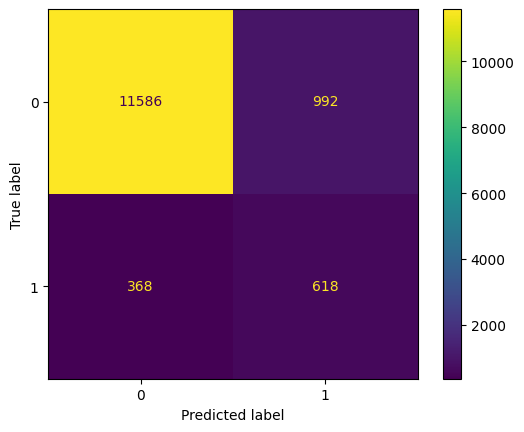

In [ ]:
#Confusion Matrix
cm = confusion_matrix(pred_y, test_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [ ]:
#Classification Report
print(classification_report(pred_y, test_y))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     12578
           1       0.38      0.63      0.48       986

    accuracy                           0.90     13564
   macro avg       0.68      0.77      0.71     13564
weighted avg       0.93      0.90      0.91     13564



In [ ]:
#Accuracy Score
accuracy = accuracy_score(test_y,pred_y)
print("Test Accuracy of Decision Tree Classifier : {}".format(accuracy*100))

Test Accuracy of Decision Tree Classifier : 89.97345915659098


In [ ]:
#Cross Validation Score
Cross_val = cross_val_score(clf, test_X,test_y, cv=5).mean()
print("Cross-Validation Accuracy Scores Decision Tree : ",Cross_val*100)

Cross-Validation Accuracy Scores Decision Tree :  89.24361236785194


In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(test_y,pred_y)
cm

array([[11586,   368],
       [  992,   618]])

Text(33.22222222222222, 0.5, 'Truth')

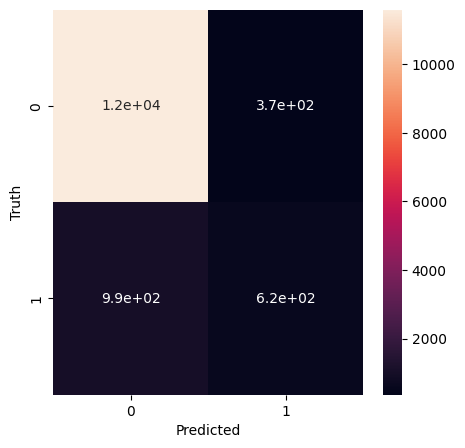

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(5,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Visualizing the Tree

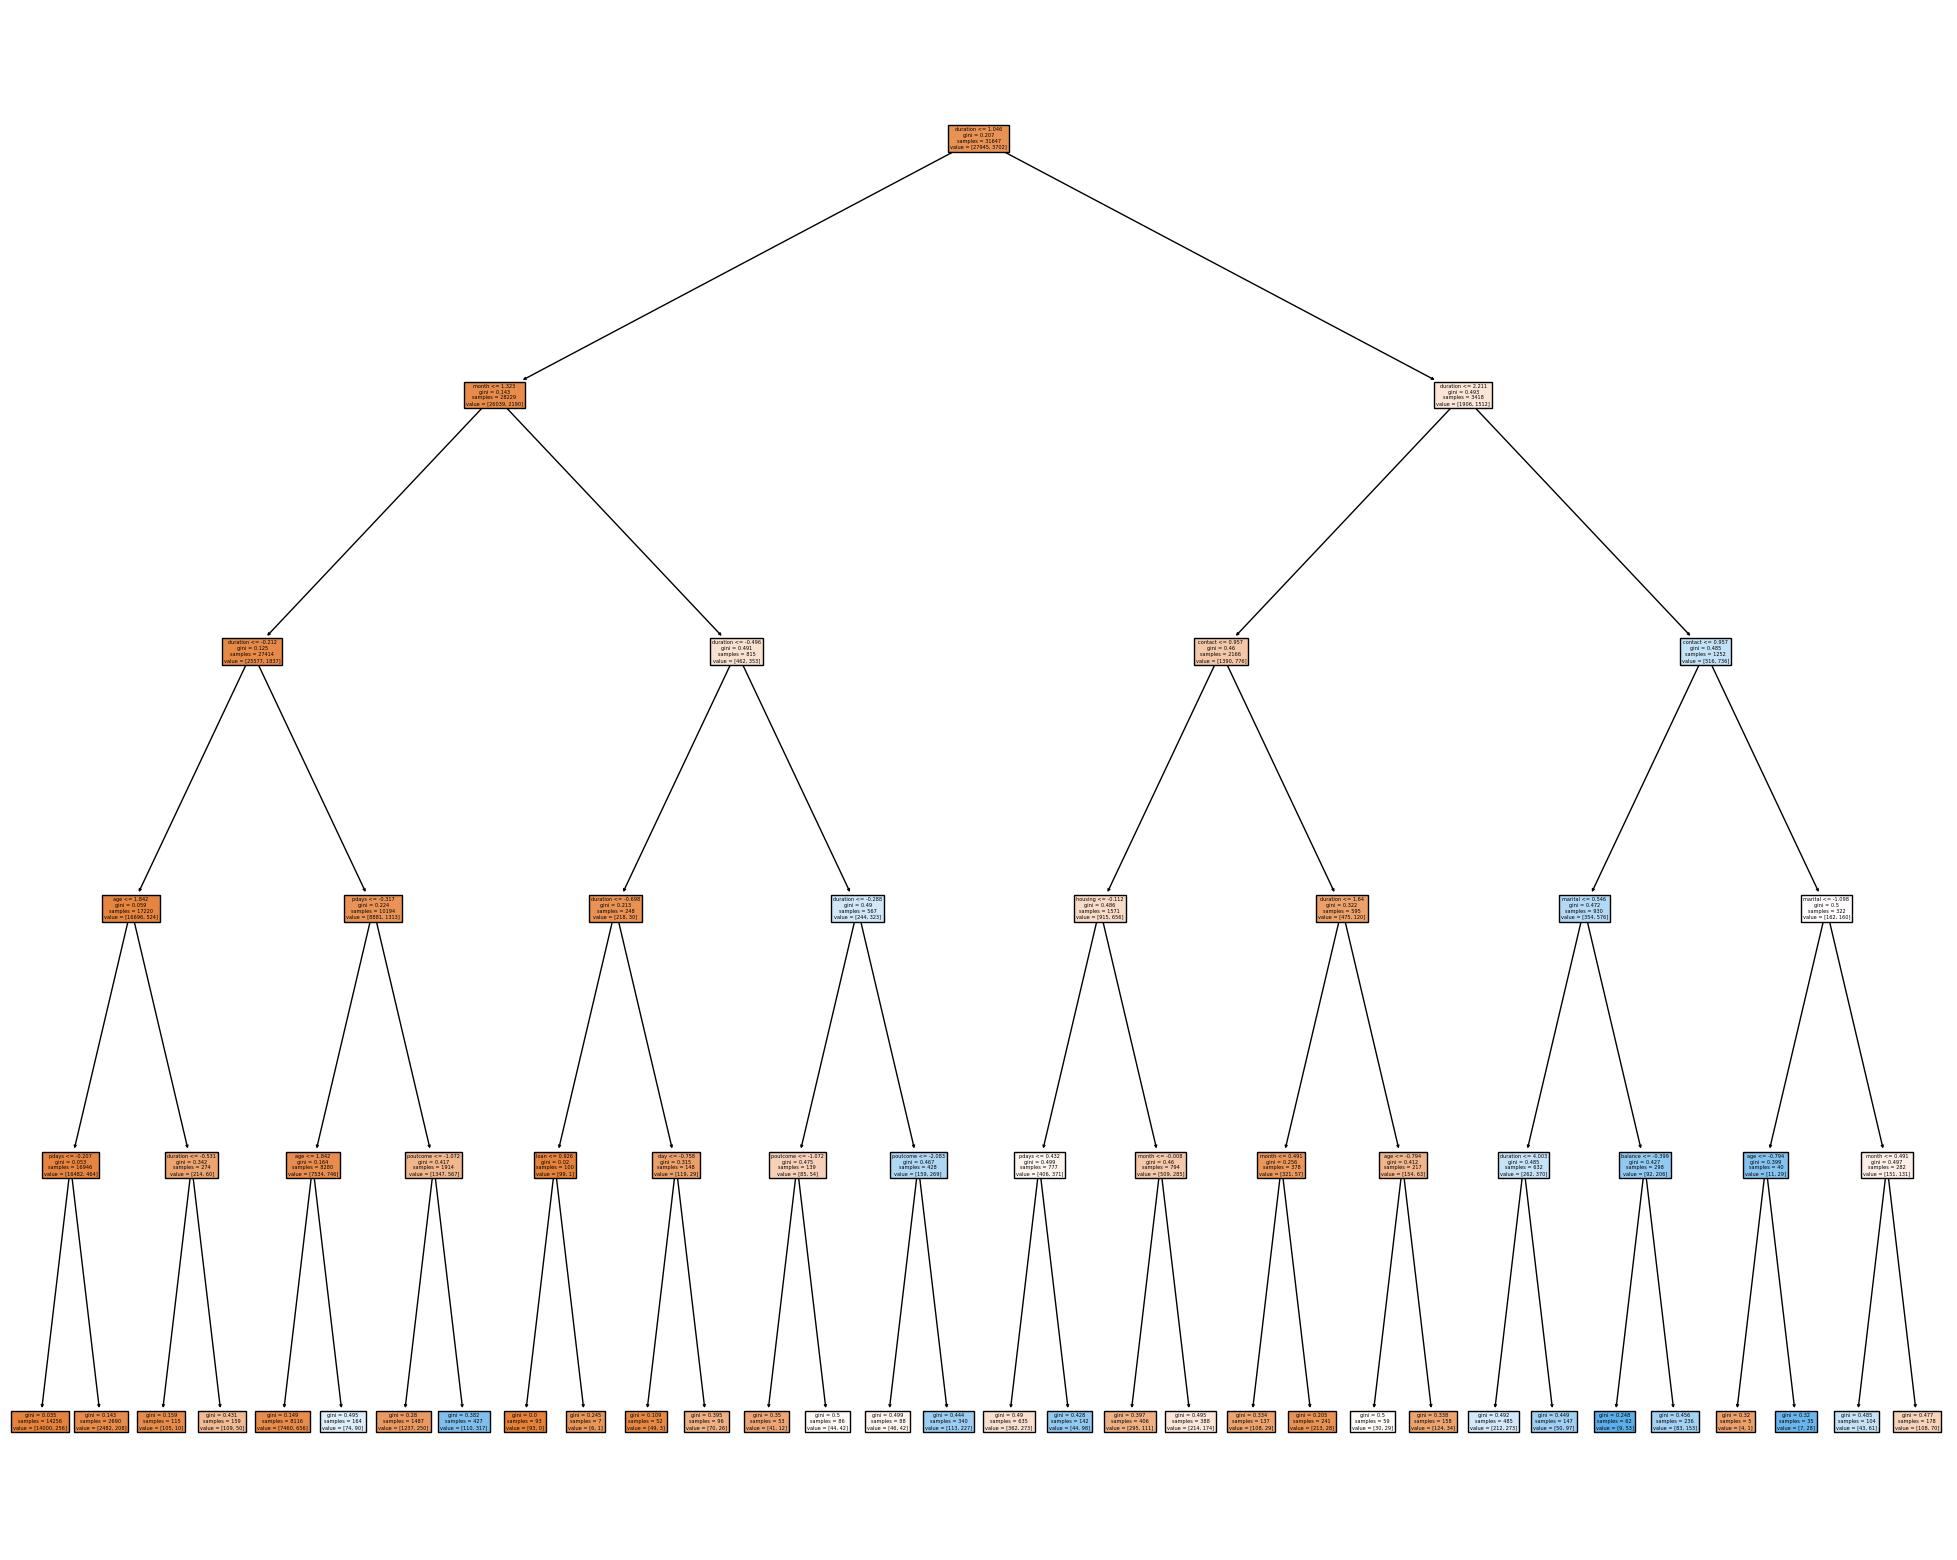

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
t= tree.plot_tree(clf,filled=True,feature_names=X.columns)